In [1]:
import pandas

In [2]:
df = pandas.read_json('bgg_data.json')
df.columns = df.iloc[0]
df.drop(df.head(1).index, inplace=True)
df

,id,year,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,age,mechanics,categories,families,expansions,poll_age,poll_numpl,numrated,numcomments,bayesaverage,average
1,1,1986,3,5,240.0,240.0,240.0,14.0,"[Alliances, Area Majority / Influence, Auction...","[Economic, Negotiation, Political]","[Country: Germany, Political: Elections, Serie...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 1, 80], [0, 1, 81], [1, 25, 72], [23, 83,...",5280,1995,7.11488,7.6157
2,2,1981,3,4,30.0,30.0,30.0,12.0,[Trick-taking],"[Card Game, Fantasy]",[Creatures: Dragons],0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 0, 2], [0, 0, 2], [0, 1, 1], [3, 0, 0], [...",560,307,5.79027,6.64231
3,3,1998,2,4,60.0,30.0,60.0,10.0,"[Area Majority / Influence, Hand Management, H...","[Abstract Strategy, Medieval]","[Country: Japan, Digital Implementations: Triq...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 5], [8, 1...","[[0, 0, 148], [103, 152, 16], [179, 92, 2], [8...",14958,3779,7.24174,7.45133
4,4,1992,2,4,60.0,60.0,60.0,12.0,"[Action Points, Area Majority / Influence, Auc...",[Ancient],"[Containers: Triangular Boxes, Country: Egypt,...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 0, 4], [1, 3, 2], [6, 2, 0], [4, 4, 0], [...",338,119,5.68493,6.59769
5,5,1964,2,6,90.0,90.0,90.0,12.0,"[Hand Management, Investment, Market, Square G...","[Economic, Territory Building]",[Series: 3M Bookshelf Series],2,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 6...","[[0, 0, 193], [2, 41, 194], [63, 164, 44], [21...",18411,5790,7.14469,7.33715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90021,99995,None,None,None,None,None,None,None,[],[],[],0,[],"[[None, None, None]]",0,3,0.0,0.0
90022,99996,None,None,None,None,None,None,None,[],[],[],0,[],"[[None, None, None]]",1,0,0.0,8.0
90023,99997,None,None,None,None,None,None,None,[],[],[],0,[],"[[None, None, None]]",0,0,0.0,0.0
90024,99998,None,None,None,None,None,None,None,[],[],[],0,[],"[[None, None, None]]",0,0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

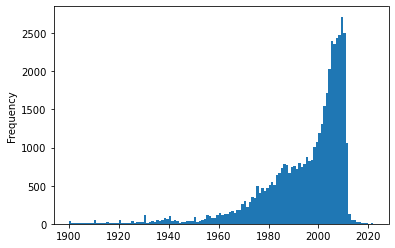

In [3]:
df['year'].plot.hist(bins=122,range=(1900,2022))

<AxesSubplot:ylabel='Frequency'>

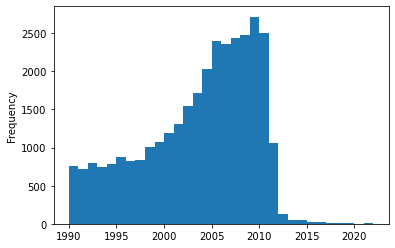

In [4]:
df['year'].plot.hist(bins=32,range=(1990,2022))